# **Nome:Felipe Schafhauser Lubke; RU: 5003159; Curso:TECNOLOGIA EM CIÊNCIA DE DADOS**

In [ ]:
# instalar o pacote
%pip install bokeh_sampledata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 21.3 MB/s eta 0:00:00


In [ ]:
# Abrir o dataframe e importar as bibliotecas.
from bokeh.sampledata.iris import flowers as data
import matplotlib.pyplot as plt

In [ ]:
# Mostra as primeiras cinco linhas do dataframe
display(data.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Mostra as dimensões do dataframe (quantas linhas e colunas)
display(data.shape)

(150, 5)

In [ ]:
# Mostra os tipos de dados das colunas
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [ ]:
# Mostra os nomes das colunas
display(data.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# Exibe um resumo das principais estatísticas do dataframe
display(data.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Exibe a frequência absoluta das espécies
display(data['species'].value_counts())

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
# Exibe a frequência relativa das espécies
display(data['species'].value_counts(normalize=True))

,proportion
species,
setosa,0.333333
versicolor,0.333333
virginica,0.333333


In [ ]:
# Calcula as frequência absolutas por espécies
species_counts = data['species'].value_counts()

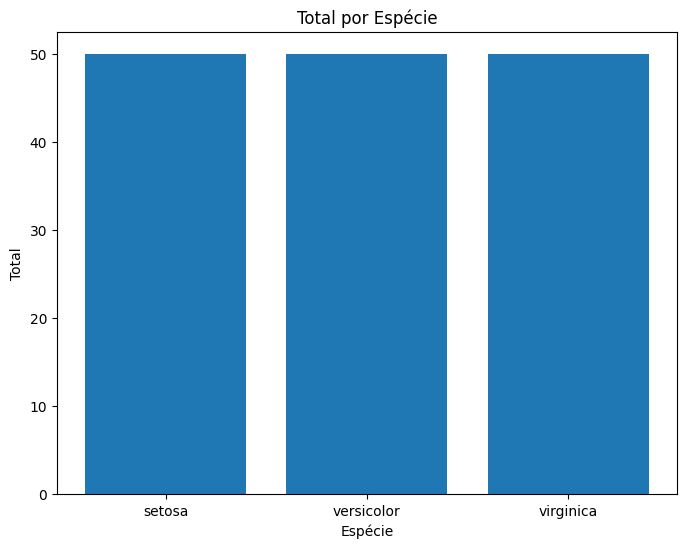

In [ ]:
# Gráfico de barras verticais
plt.figure(figsize=(8, 6))
plt.bar(species_counts.index, species_counts.values)
plt.title('Total por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Total')
plt.show()

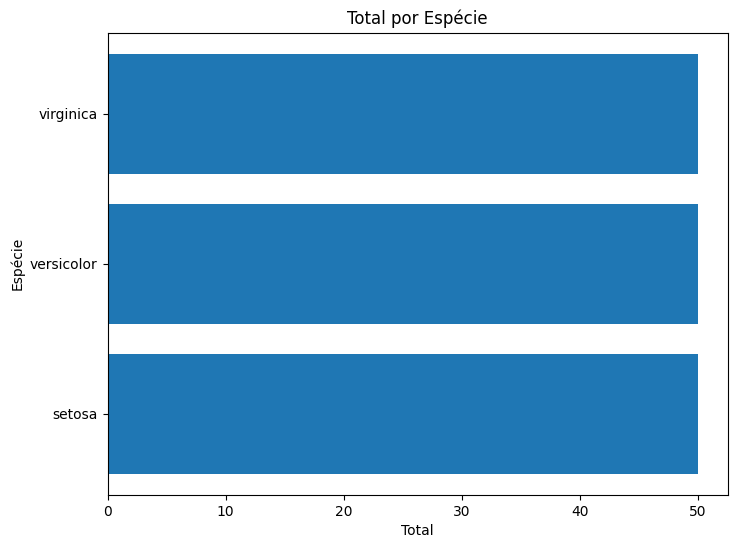

In [ ]:
# Gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(species_counts.index, species_counts.values)
plt.title('Total por Espécie')
plt.xlabel('Total')
plt.ylabel('Espécie')
plt.show()

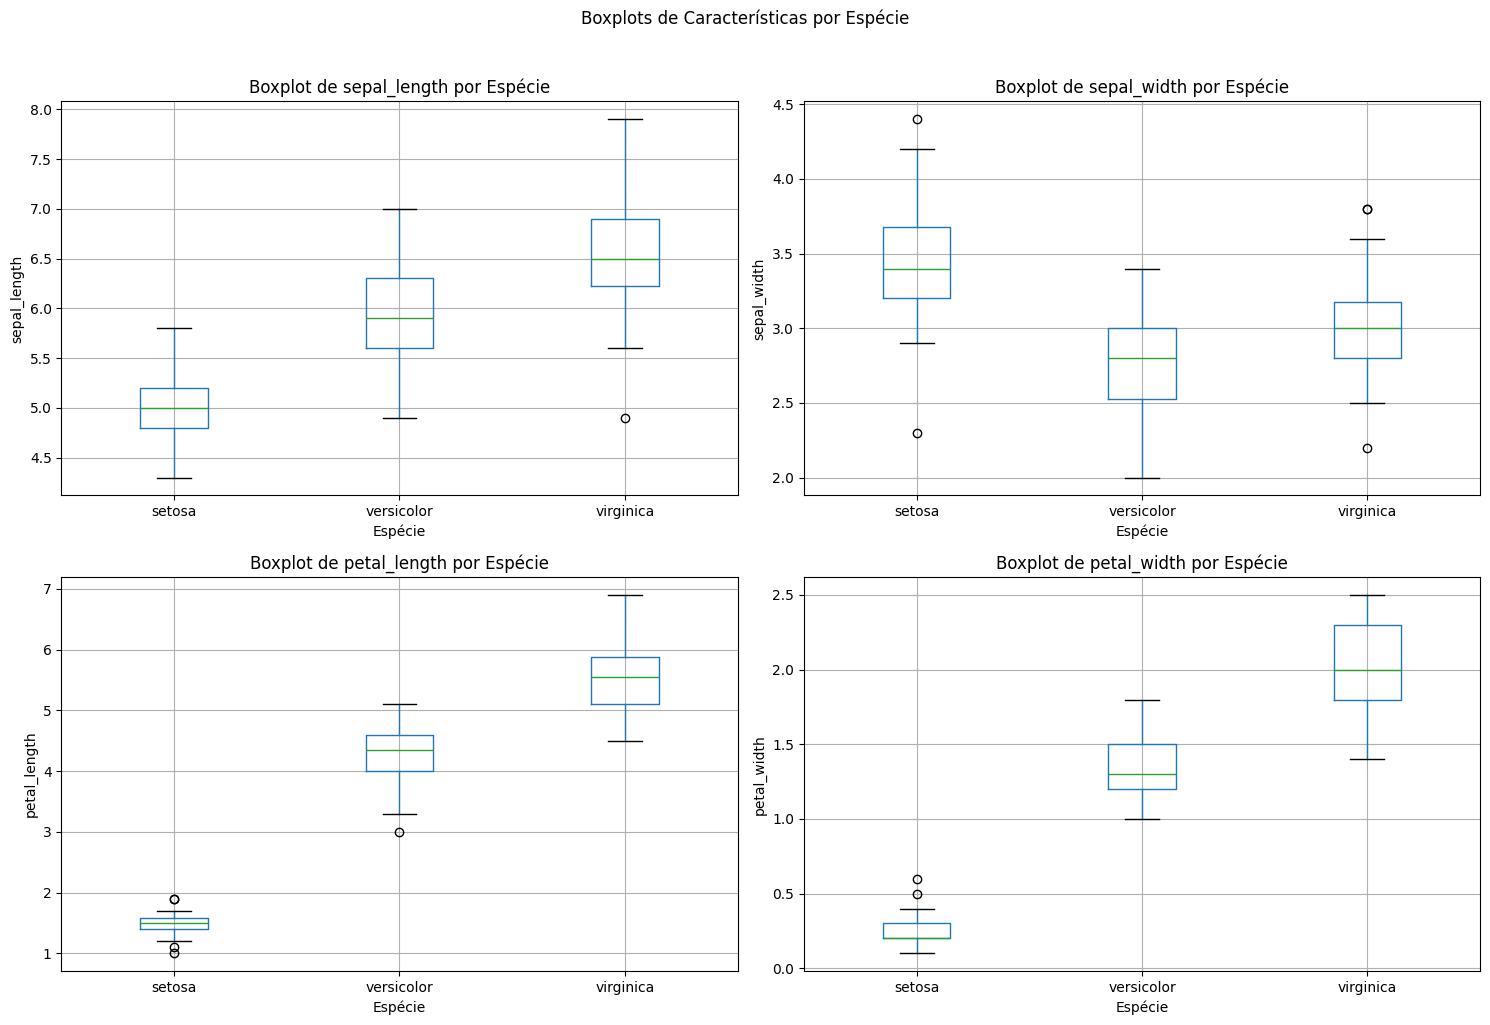

In [ ]:
# Exibir boxplots de todas as colunas numéricas por espécie em um único gráfico
numerical_cols = data.select_dtypes(include=['float64']).columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10)) # Crie subplots 2x2
axes = axes.flatten() # Achata a matriz de eixos para iterar facilmente

for i, col in enumerate(numerical_cols):
    data.boxplot(column=col, by='species', ax=axes[i]) # Passe o eixo para o boxplot
    axes[i].set_title(f'Boxplot de {col} por Espécie') # Defina o título para cada subplot
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Espécie') # Defina o rótulo do eixo x para cada subplot

plt.suptitle('Boxplots de Características por Espécie', y=1.02) # Título geral para a figura
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
# Calcular a média por espécies
mean_by_species = data.groupby('species')[numerical_cols].mean()
print("Média por Espécies:")
display(mean_by_species)


Média por Espécies:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
# Calcular a mediana por espécies
median_by_species = data.groupby('species')[numerical_cols].median()
print("\nMediana por Espécies:")
display(median_by_species)


Mediana por Espécies:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [ ]:
# Calcular o desvio padrão por espécies
std_by_species = data.groupby('species')[numerical_cols].std()
print("Desvio Padrão por Espécies:")
display(std_by_species)

Desvio Padrão por Espécies:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [ ]:
# Calcular a variância por espécies
variance_by_species = data.groupby('species')[numerical_cols].var()
print("\nVariância por Espécies:")
display(variance_by_species)


Variância por Espécies:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


**no max 5 linhas, considerando os itens 3, 4, 8, 9 e o que você observou no boxplot**

---



Vemos que a espécies tem a mesma frequência, 50 observações para cada uma, gerando uma distribuição de 0,33 para cada. Conseguimos observar que a espécie setosa tem um valor menor para todas as medidas analisadas, menos em relação a sepal width que ela tem o mai-or valor. Em relação ao box plot, conseguimos observar esse comportamento de maneira mais fácil ao olhar o posicionamento das caixas, onde a setosa sempre está posicionada mais abaixo nos gráficos, menos em relação a sepal width que ela se posiciona mais a cima.